<a href="https://colab.research.google.com/github/WildanBudiawanZ/pembelajaran-mesin/blob/main/Pertemuan_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN

Contoh Implementasi CNN untuk klasifikasi kamar clean dan messy

dataset:
https://www.kaggle.com/datasets/cdawn1/messy-vs-clean-room

In [14]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [17]:
!wget --no-check-certificate \
  https://github.com/WildanBudiawanZ/pembelajaran-mesin/blob/main/mcr2.zip?raw=true \
  -O /tmp/mcr.zip

--2022-04-29 04:12:07--  https://github.com/WildanBudiawanZ/pembelajaran-mesin/blob/main/mcr2.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/WildanBudiawanZ/pembelajaran-mesin/raw/main/mcr2.zip [following]
--2022-04-29 04:12:07--  https://github.com/WildanBudiawanZ/pembelajaran-mesin/raw/main/mcr2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/mcr2.zip [following]
--2022-04-29 04:12:08--  https://raw.githubusercontent.com/WildanBudiawanZ/pembelajaran-mesin/main/mcr2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connecte

In [18]:
# melakukan ekstraksi pada file zip
import zipfile,os
os.listdir('/tmp/')

['pyright-196-IbuGxau58IPq',
 'pyright-102-v2ZpitKEqIY8',
 'dap_multiplexer.INFO',
 'pyright-181-4Wra5JtXIgLw',
 'initgoogle_syslog_dir.0',
 'dap_multiplexer.1c41a4c3073a.root.log.INFO.20220429-030031.50',
 'pyright-181-IlnU3ZEFzVR7',
 'python-languageserver-cancellation',
 'pyright-196-8KhhChQ7UzqQ',
 'mcr.zip',
 '.ipynb_checkpoints',
 'pyright-102-TFPwJN5iMupj',
 'debugger_2d283wmzh3']

In [19]:
!unzip '/tmp/mcr.zip' -d '/tmp/mcr'

Archive:  /tmp/mcr.zip
   creating: /tmp/mcr/images/
   creating: /tmp/mcr/images/images/
   creating: /tmp/mcr/images/images/test/
  inflating: /tmp/mcr/images/images/test/0.png  
  inflating: /tmp/mcr/images/images/test/1.png  
  inflating: /tmp/mcr/images/images/test/2.png  
  inflating: /tmp/mcr/images/images/test/3.png  
  inflating: /tmp/mcr/images/images/test/4.png  
  inflating: /tmp/mcr/images/images/test/5.png  
  inflating: /tmp/mcr/images/images/test/6.png  
  inflating: /tmp/mcr/images/images/test/7.png  
  inflating: /tmp/mcr/images/images/test/8.png  
  inflating: /tmp/mcr/images/images/test/9.png  
   creating: /tmp/mcr/images/images/train/
   creating: /tmp/mcr/images/images/train/clean/
  inflating: /tmp/mcr/images/images/train/clean/0.png  
  inflating: /tmp/mcr/images/images/train/clean/1.png  
  inflating: /tmp/mcr/images/images/train/clean/10.png  
  inflating: /tmp/mcr/images/images/train/clean/11.png  
  inflating: /tmp/mcr/images/images/train/clean/12.png  
  i

In [22]:
os.listdir('/tmp/mcr/images/images')

['test', 'val', 'train']

In [27]:
# set directory

base_dir = '/tmp/mcr/images/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [29]:
os.listdir(validation_dir)

['clean', 'messy']

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [40]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/50
25/25 - 4s - loss: 0.3627 - accuracy: 0.9000 - val_loss: 0.6594 - val_accuracy: 0.7000 - 4s/epoch - 175ms/step
Epoch 2/50
25/25 - 4s - loss: 0.3461 - accuracy: 0.8900 - val_loss: 0.5002 - val_accuracy: 0.8000 - 4s/epoch - 169ms/step
Epoch 3/50
25/25 - 4s - loss: 0.4318 - accuracy: 0.8100 - val_loss: 0.4052 - val_accuracy: 0.7000 - 4s/epoch - 169ms/step
Epoch 4/50
25/25 - 4s - loss: 0.2447 - accuracy: 0.9100 - val_loss: 0.3495 - val_accuracy: 0.7500 - 4s/epoch - 173ms/step
Epoch 5/50
25/25 - 4s - loss: 0.3389 - accuracy: 0.8600 - val_loss: 0.4346 - val_accuracy: 0.8000 - 4s/epoch - 169ms/step
Epoch 6/50
25/25 - 4s - loss: 0.2732 - accuracy: 0.8800 - val_loss: 0.1786 - val_accuracy: 0.9000 - 4s/epoch - 168ms/step
Epoch 7/50
25/25 - 4s - loss: 0.1729 - accuracy: 0.9300 - val_loss: 0.2444 - val_accuracy: 0.8500 - 4s/epoch - 170ms/step
Epoch 8/50
25/25 - 4s - loss: 0.4966 - accuracy: 0.7900 - val_loss: 0.5044 - val_accuracy: 0.7000 - 4s/epoch - 169ms/step
Epoch 9/50
25/25 - 4s - 

Saving 9.png to 9.png
9.png
messy


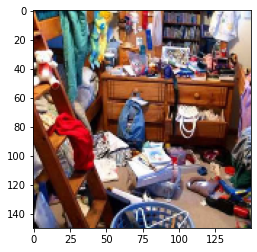

In [43]:
import numpy as np
from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
 
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
 
  classes = model.predict(images, batch_size=10)  
  print(fn)
  if classes!=0:
   print('messy')
  else:
   print('clean')